<a href="https://colab.research.google.com/github/valsson-group/UNT-ChemicalApplicationsOfMachineLearning-Spring2026/blob/main/Lecture-3_January-20-2026/Lecture-3_January-20-2026_pandas_and_RDKit_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lecture 3 - January 20, 2026






In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture

plt.rcParams['figure.dpi'] = 100

## pandas and RDKit

### pandas
Pandas is popular python library for data analysis that is espesically useful for tabular data. There data is stored in a pandas DataFrame object that is similar to numpy array but is more flexible concerning the data it can store, e.g., it can store strings and other python types.

- [pandas user guide](https://pandas.pydata.org/docs/user_guide/index.html)
- [pandas getting started tutorials](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html)

### RDKit
RDKit is a powerful cheminformatics library that we will use extensively throughout the course.

- [Getting Started with the RDKit in Python](https://www.rdkit.org/docs/GettingStartedInPython.html)

### Useful tutorals
[Pat Walters](https://github.com/PatWalters/practical_cheminformatics_tutorials?tab=readme-ov-file) has two excellent tutorial Jupyter notebooks on pandas and RDKit:
- [A Quick Overview of Pandas for Cheminformatics](https://colab.research.google.com/github/PatWalters/practical_cheminformatics_tutorials/blob/main/fundamentals/pandas_intro.ipynb)
- [A Whirlwind Introduction to the RDKit for Cheminformatics](https://colab.research.google.com/github/PatWalters/practical_cheminformatics_tutorials/blob/main/fundamentals/A_Whirlwind_Introduction_To_The_RDKit.ipynb)

- [MolSSI - Introduction to RDKit](https://education.molssi.org/python-data-science-chemistry/rdkit_descriptors/rdkit.html)

#### Dataset

Here, we will consider the Bradley Melting Point Dataset, which is curated chemical dataset with melting points of around 3,000 chemical compounds, see [here](https://www.kaggle.com/datasets/aliffaagnur/melting-point-chemical-dataset/data).

This dataset is stored in a comma-separated values (csv) file, which is common format used to start data in text files. We load this into a pandas DataFrame using the `load_csv` function.



In [1]:
# download datasets
%%capture
!wget https://raw.githubusercontent.com/valsson-group/UNT-ChemicalApplicationsOfMachineLearning-Spring2026/refs/heads/main/Lecture-3_January-20-2026/BradleyDoublePlusGoodMeltingPointDataset.csv


In [4]:
# doesn't work
data_mp = np.loadtxt("BradleyDoublePlusGoodMeltingPointDataset.csv")

ValueError: could not convert string 'key,name,smiles,mpC,csid,link,source,count,min,max,range' to float64 at row 0, column 1.

In [5]:
import pandas as pd

In [6]:
data_mp = pd.read_csv("BradleyDoublePlusGoodMeltingPointDataset.csv")

In [7]:
data_mp

,key,name,smiles,mpC,csid,link,source,count,min,max,range
0,27956,cyclobutylmethane,C1(CCC1)C,-161.51,11232,http://pubs.acs.org/doi/abs/10.1021/ja01142a048,Lemaire HP; Livingston RL Journal of the Ameri...,2,-161.51,-161.5,0.01
1,16005,Nitrogen oxide,[O-][N+]#N,-90.80,923,http://msds.chem.ox.ac.uk/,academic website,2,-90.81,-90.8,0.01
2,16127,Sulfuryl difluoride,FS(F)(=O)=O,-135.80,16647,http://msds.chem.ox.ac.uk/,academic website,2,-135.82,-135.8,0.02
3,17138,disopyramide,CC(C)N(CCC(c1ccccn1)(c2ccccc2)C(N)=O)C(C)C,94.80,3002,http://dx.doi.org/10.1021/ci700307p,Hughes LD; Palmer DS; Nigsch F and Mitchell JB...,2,94.75,94.8,0.05
4,15628,Bromine,BrBr,-7.20,22817,http://msds.chem.ox.ac.uk/,academic website,2,-7.25,-7.2,0.05
...,...,...,...,...,...,...,...,...,...,...,...
3036,27698,4-Nitrobenzoic acid,C1=CC(=CC=C1C(=O)O)[N+](=O)[O-],240.00,5882,http://dx.doi.org/10.1016/j.chemosphere.2013.1...,Abraham M.H. and Acree Jr. W.E. The solubility...,6,237.00,242.0,5.00
3037,28584,Thalidomide,C1CC(=O)NC(=O)C1N2C(=O)C3=CC=CC=C3C2=O,275.00,5233,http://dx.doi.org/10.1016/j.chemosphere.2013.1...,Abraham M.H. and Acree Jr. W.E. The solubility...,7,270.00,275.0,5.00
3038,28068,Estradiol,C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2O)CCC4=C3...,176.00,5554,http://dx.doi.org/10.1016/j.chemosphere.2013.1...,Abraham M.H. and Acree Jr. W.E. The solubility...,7,173.00,178.0,5.00
3039,27580,"2,4,6-Trichlorophenol",C1=C(C=C(C(=C1Cl)O)Cl)Cl,65.00,21106172,http://dx.doi.org/10.1016/j.chemosphere.2013.1...,Abraham M.H. and Acree Jr. W.E. The solubility...,9,65.00,70.0,5.00


Pandas reads in the header of the csv file and uses that to define keys for each column that we can use to reference a certain column.

You can obtain the keys in the DataFrame by using `data_mp.keys()`.

In [12]:
print(data_mp.keys())
# or
print(" ")
print(list(data_mp.keys()))

Index(['key', 'name', 'smiles', 'mpC', 'csid', 'link', 'source', 'count',
       'min', 'max', 'range'],
      dtype='object')
 
['key', 'name', 'smiles', 'mpC', 'csid', 'link', 'source', 'count', 'min', 'max', 'range']


In [13]:
data_mp['mpC']

,mpC
0,-161.51
1,-90.80
2,-135.80
3,94.80
4,-7.20
...,...
3036,240.00
3037,275.00
3038,176.00
3039,65.00


In [17]:
data_mp['name']

,name
0,cyclobutylmethane
1,Nitrogen oxide
2,Sulfuryl difluoride
3,disopyramide
4,Bromine
...,...
3036,4-Nitrobenzoic acid
3037,Thalidomide
3038,Estradiol
3039,"2,4,6-Trichlorophenol"


In [19]:
data_mp.describe()

,key,mpC,csid,count,min,max,range
count,3041.000000,3041.000000,3.041000e+03,3041.000000,3041.000000,3041.000000,3041.000000
mean,10771.570865,62.848159,2.027796e+06,2.798422,62.229536,63.879092,1.649556
std,6875.518120,96.007422,5.474893e+06,1.275456,95.877685,96.229485,1.293567
min,10.000000,-188.000000,1.800000e+01,2.000000,-188.000000,-187.600000,0.010000
25%,5148.000000,5.000000,7.634000e+03,2.000000,4.800000,5.600000,0.500000
50%,13103.000000,64.000000,1.282900e+04,2.000000,62.750000,65.000000,1.000000
75%,15269.000000,129.500000,6.675900e+04,3.000000,129.000000,130.800000,2.500000
max,28644.000000,438.000000,2.142902e+07,16.000000,437.300000,440.000000,5.000000


In [20]:
data_mp['mpC'].describe()

,mpC
count,3041.000000
mean,62.848159
std,96.007422
min,-188.000000
25%,5.000000
50%,64.000000
75%,129.500000
max,438.000000


You can plot data by using the `.plot()` function and make a histogram using `.hist()` function.

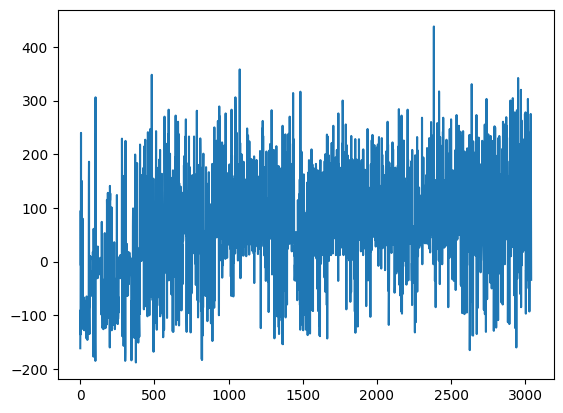

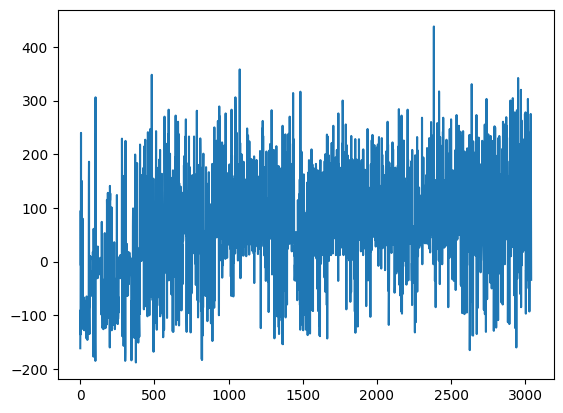

In [21]:
data_mp['mpC'].plot()
plt.show()
# this is identical to
plt.plot(data_mp['mpC'])
plt.show()



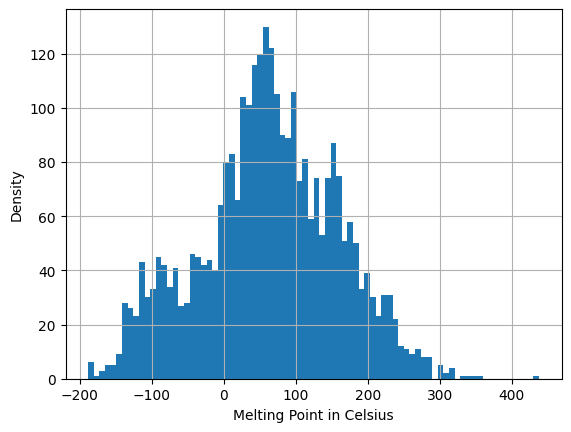

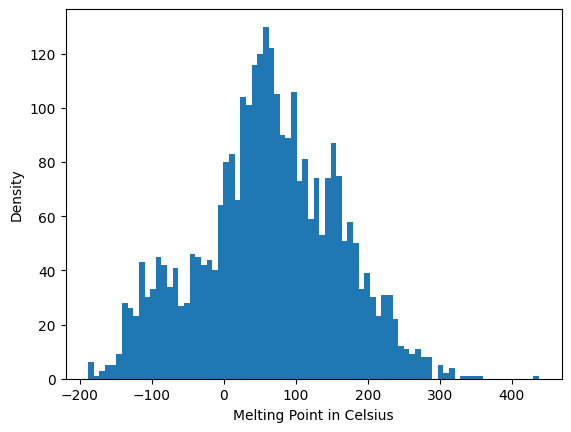

In [24]:
data_mp['mpC'].hist(bins=80)
plt.xlabel("Melting Point in Celsius")
plt.ylabel("Density")
plt.show()
# this is identical to
plt.hist(data_mp['mpC'],bins=80)
plt.xlabel("Melting Point in Celsius")
plt.ylabel("Density")
plt.show()

In [25]:
data_mp['smiles']

,smiles
0,C1(CCC1)C
1,[O-][N+]#N
2,FS(F)(=O)=O
3,CC(C)N(CCC(c1ccccn1)(c2ccccc2)C(N)=O)C(C)C
4,BrBr
...,...
3036,C1=CC(=CC=C1C(=O)O)[N+](=O)[O-]
3037,C1CC(=O)NC(=O)C1N2C(=O)C3=CC=CC=C3C2=O
3038,C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2O)CCC4=C3...
3039,C1=C(C=C(C(=C1Cl)O)Cl)Cl


One of the columns are the compounds [SMILES strings](https://en.wikipedia.org/wiki/Simplified_Molecular_Input_Line_Entry_System), which is a line notation to represent molecular structure of chemical compounds in a text format.

- [An Introduction to the Simplified Molecular Input Line Entry System (SMILES)](https://colab.research.google.com/github/PatWalters/practical_cheminformatics_tutorials/blob/main/fundamentals/SMILES_tutorial.ipynb#scrollTo=infectious-smell)

In [26]:
# note the double brackets, here we are passing a list of keys to show two columns
data_mp[ ['name','smiles'] ]

,name,smiles
0,cyclobutylmethane,C1(CCC1)C
1,Nitrogen oxide,[O-][N+]#N
2,Sulfuryl difluoride,FS(F)(=O)=O
3,disopyramide,CC(C)N(CCC(c1ccccn1)(c2ccccc2)C(N)=O)C(C)C
4,Bromine,BrBr
...,...,...
3036,4-Nitrobenzoic acid,C1=CC(=CC=C1C(=O)O)[N+](=O)[O-]
3037,Thalidomide,C1CC(=O)NC(=O)C1N2C(=O)C3=CC=CC=C3C2=O
3038,Estradiol,C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2O)CCC4=C3...
3039,"2,4,6-Trichlorophenol",C1=C(C=C(C(=C1Cl)O)Cl)Cl


We can use RDKit to work with smiles strings.

First we need to install RDKit into our Google Colab instance as it is not installed by default. You will need to do that everytime. However, that will take a very short time.

In [27]:
# the %%capture command will surpress output to screen
%%capture
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    !pip install rdkit

In [28]:
from rdkit import Chem

chlordiazepoxide: Clc1ccc2N=C(C[N+]([O-])=C(c2c1)c3ccccc3)NC


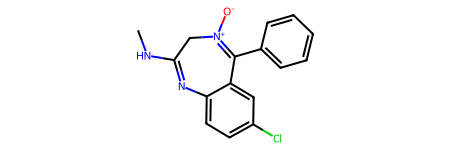

In [34]:
idx=100
name = data_mp['name'][idx]
smi = data_mp['smiles'][idx]
print(f"{name:s}: {smi:s}")
mol = Chem.MolFromSmiles(smi)
mol

You can convert the column into a numpy array using the `.to_numpy()` function and to a list using the `.to_list()` function.

In [35]:
melting_point_c = data_mp['mpC'].to_numpy()
names = data_mp['name'].to_list()
smiles = data_mp['smiles'].to_list()

In [39]:
melting_point_c.max()

np.float64(438.0)

Let's calculate some descriptors/features for the molecules and see how they correlate the melting points.

We start with very naive and stupid features.

In [40]:
# here we use list comprehension that allows us
# to write very compact code when working with lists.
names_length = [len(s) for s in names]
smiles_length = [len(s) for s in smiles]

In [41]:
print(names_length)

[17, 14, 19, 12, 7, 12, 23, 18, 6, 9, 18, 32, 17, 19, 19, 16, 30, 16, 23, 22, 18, 18, 24, 23, 13, 27, 23, 21, 19, 23, 17, 17, 27, 22, 21, 26, 18, 26, 36, 21, 17, 16, 12, 22, 15, 19, 20, 15, 8, 17, 16, 13, 15, 20, 8, 8, 24, 22, 10, 8, 12, 14, 12, 12, 16, 34, 17, 12, 11, 20, 15, 23, 22, 18, 27, 18, 15, 13, 14, 19, 23, 20, 21, 20, 10, 10, 24, 17, 18, 18, 31, 18, 27, 15, 20, 28, 17, 28, 27, 18, 16, 11, 10, 18, 30, 17, 13, 18, 27, 26, 26, 19, 17, 19, 28, 8, 19, 18, 12, 11, 20, 14, 19, 19, 14, 9, 25, 15, 20, 16, 18, 26, 18, 26, 16, 22, 25, 13, 10, 14, 10, 17, 18, 16, 15, 16, 15, 14, 15, 22, 19, 14, 19, 12, 18, 24, 14, 13, 18, 21, 14, 17, 21, 21, 17, 23, 14, 20, 17, 21, 28, 28, 15, 19, 14, 13, 21, 25, 13, 18, 21, 23, 10, 15, 18, 14, 46, 22, 18, 13, 14, 22, 21, 16, 24, 8, 12, 27, 9, 10, 32, 12, 21, 7, 20, 21, 27, 13, 18, 18, 23, 25, 22, 18, 14, 19, 27, 24, 16, 27, 18, 14, 21, 22, 14, 27, 24, 17, 17, 33, 31, 28, 17, 23, 23, 23, 10, 14, 25, 17, 14, 13, 8, 15, 14, 9, 14, 9, 21, 14, 12, 13, 10, 14

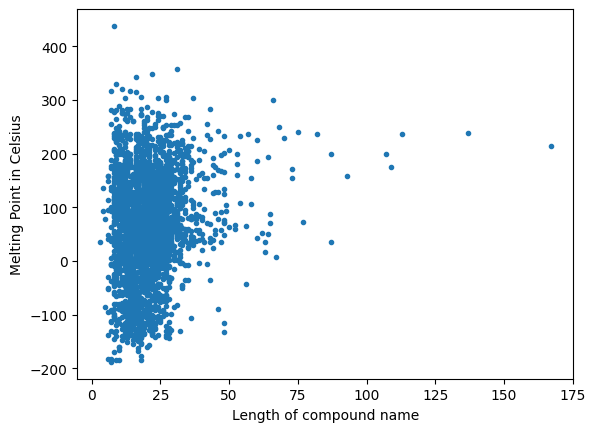

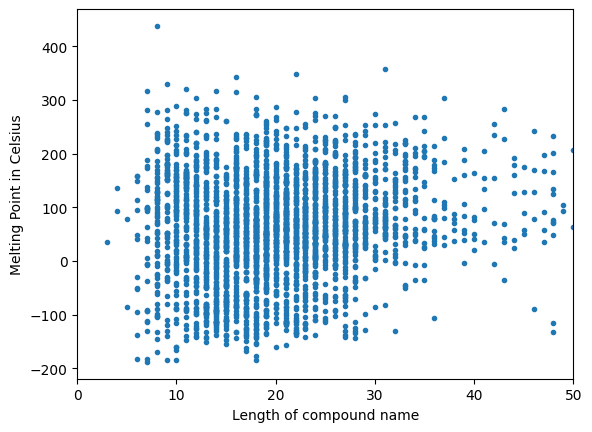

In [42]:
plt.plot(names_length,melting_point_c,'.')
plt.ylabel("Melting Point in Celsius")
plt.xlabel("Length of compound name")
plt.show()

plt.plot(names_length,melting_point_c,'.')
plt.ylabel("Melting Point in Celsius")
plt.xlabel("Length of compound name")
plt.xlim([0,50])
plt.show()


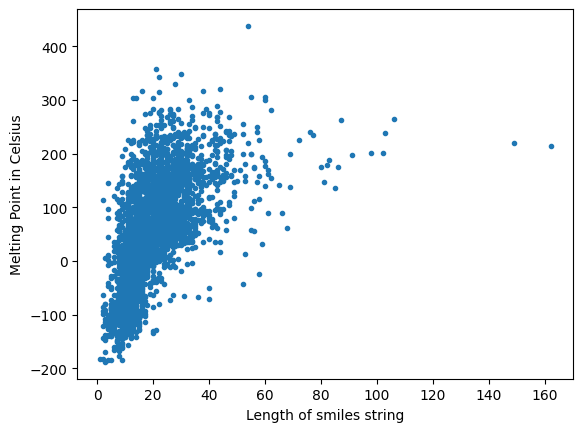

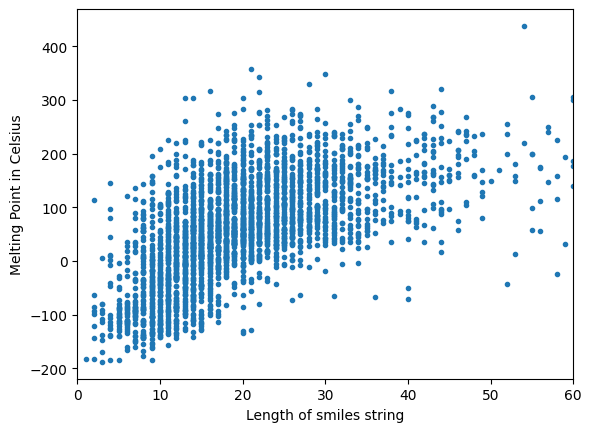

In [43]:
plt.plot(smiles_length,melting_point_c,'.')
plt.ylabel("Melting Point in Celsius")
plt.xlabel("Length of smiles string")
plt.show()

plt.plot(smiles_length,melting_point_c,'.')
plt.ylabel("Melting Point in Celsius")
plt.xlabel("Length of smiles string")
plt.xlim([0,60])
plt.show()

In [51]:
string = "HellO"
print(string)
print(string.lower())
print(string.upper())
print(string.upper().lower())

print(string.count("L"))

HellO
hello
HELLO
hello
0


In [48]:
string = "data_file_XX"
print(string)
new_string = string.replace("XX","01")
print(new_string)


data_file_XX
data_file_01


In [52]:
# .lower() is a string function that converts a string to lower case
# .count() is a string function that counts that number of certain character/word in a string
# you can see how we can stack these two commands
# this is actully wrong - don't do it like this
number_of_carbons = [s.lower().count('c') for s in smiles]
number_of_oxygens = [s.lower().count('o') for s in smiles]

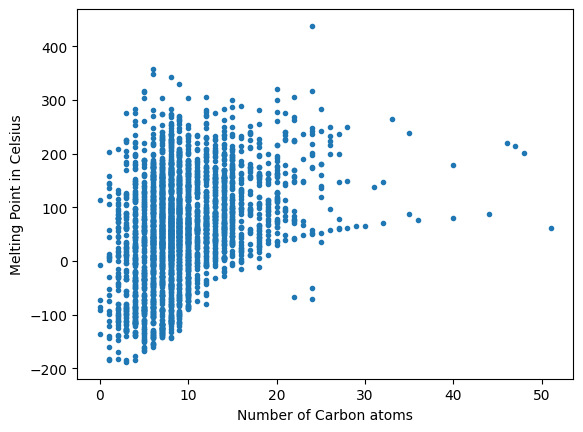

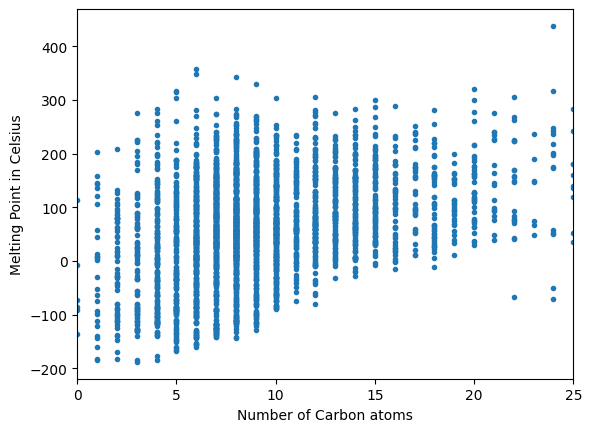

In [53]:
plt.plot(number_of_carbons,melting_point_c,'.')
plt.ylabel("Melting Point in Celsius")
plt.xlabel("Number of Carbon atoms")
plt.show()

plt.plot(number_of_carbons,melting_point_c,'.')
plt.ylabel("Melting Point in Celsius")
plt.xlabel("Number of Carbon atoms")
plt.xlim([0,25])
plt.show()

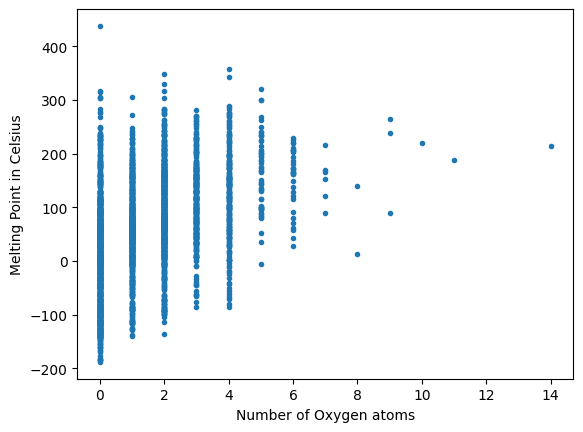

In [54]:
plt.plot(number_of_oxygens,melting_point_c,'.')
plt.ylabel("Melting Point in Celsius")
plt.xlabel("Number of Oxygen atoms")
plt.show()


We can use RDKit to calculate various molecular descriptors/features.

- [Descriptor calculation tutorial](https://greglandrum.github.io/rdkit-blog/posts/2022-12-23-descriptor-tutorial.html)
- [rdkit.Chem.Descriptors module](https://www.rdkit.org/docs/source/rdkit.Chem.Descriptors.html)
- [rdkit.Chem.rdMolDescriptors module](https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html)

In [56]:
from rdkit.Chem import Descriptors, rdMolDescriptors


There are a wide range of descriptors/features available

In [57]:
print("Descriptors.__")
for des in Descriptors._descList: print("-",des[0])

Descriptors.__
- MaxAbsEStateIndex
- MaxEStateIndex
- MinAbsEStateIndex
- MinEStateIndex
- qed
- SPS
- MolWt
- HeavyAtomMolWt
- ExactMolWt
- NumValenceElectrons
- NumRadicalElectrons
- MaxPartialCharge
- MinPartialCharge
- MaxAbsPartialCharge
- MinAbsPartialCharge
- FpDensityMorgan1
- FpDensityMorgan2
- FpDensityMorgan3
- BCUT2D_MWHI
- BCUT2D_MWLOW
- BCUT2D_CHGHI
- BCUT2D_CHGLO
- BCUT2D_LOGPHI
- BCUT2D_LOGPLOW
- BCUT2D_MRHI
- BCUT2D_MRLOW
- AvgIpc
- BalabanJ
- BertzCT
- Chi0
- Chi0n
- Chi0v
- Chi1
- Chi1n
- Chi1v
- Chi2n
- Chi2v
- Chi3n
- Chi3v
- Chi4n
- Chi4v
- HallKierAlpha
- Ipc
- Kappa1
- Kappa2
- Kappa3
- LabuteASA
- PEOE_VSA1
- PEOE_VSA10
- PEOE_VSA11
- PEOE_VSA12
- PEOE_VSA13
- PEOE_VSA14
- PEOE_VSA2
- PEOE_VSA3
- PEOE_VSA4
- PEOE_VSA5
- PEOE_VSA6
- PEOE_VSA7
- PEOE_VSA8
- PEOE_VSA9
- SMR_VSA1
- SMR_VSA10
- SMR_VSA2
- SMR_VSA3
- SMR_VSA4
- SMR_VSA5
- SMR_VSA6
- SMR_VSA7
- SMR_VSA8
- SMR_VSA9
- SlogP_VSA1
- SlogP_VSA10
- SlogP_VSA11
- SlogP_VSA12
- SlogP_VSA2
- SlogP_VSA3
- SlogP

chlordiazepoxide: Clc1ccc2N=C(C[N+]([O-])=C(c2c1)c3ccccc3)NC
Molecular weight: 299.761
Ring Count: 3
Heavy Atom Count: 21
Number of Rotatable Bonds: 1


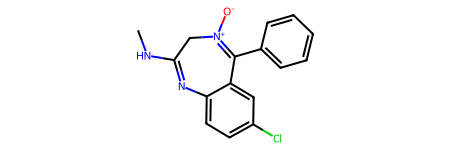

In [65]:
idx=100
name = data_mp['name'][idx]
smi = data_mp['smiles'][idx]
print(f"{name:s}: {smi:s}")
mol = Chem.MolFromSmiles(smi)
print("Molecular weight:",Descriptors.MolWt(mol))
print("Ring Count:",Descriptors.RingCount(mol))
print("Heavy Atom Count:",Descriptors.HeavyAtomCount(mol))
print("Number of Rotatable Bonds:",Descriptors.NumRotatableBonds(mol))
mol


In [66]:
# this will not work correctly
molecular_weight = [Descriptors.MolWt(Chem.MolFromSmiles(smi)) for smi in smiles]

[17:40:39] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4


ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors._CalcMolWt(NoneType)
did not match C++ signature:
    _CalcMolWt(RDKit::ROMol mol, bool onlyHeavy=False)

In [68]:
# We start with molecular weight

# create empty list
molecular_weight = [None]*len(smiles)

for i, smi in enumerate(smiles):
  mol = Chem.MolFromSmiles(smi)
  if mol is not None:
    molecular_weight[i] = Descriptors.MolWt(mol)
  else:
    molecular_weight[i] = np.nan
    print(f"Error with {i:4d} - {smi}")
# convert list to numpy array
molecular_weight = np.array(molecular_weight)



[17:45:21] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[17:45:21] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
[17:45:21] Can't kekulize mol.  Unkekulized atoms: 24 25 26 27 28 31 32 33 34
[17:45:21] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[17:45:21] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[17:45:21] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[17:45:21] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20 21 22 23 24
[17:45:21] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
[17:45:21] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[17:45:21] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[17:45:21] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[17:45:21] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[17:45:21] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 12 13 14 15 16
[17:45:21] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[17:45:21] Can't kekulize mol.  Unkekuliz

Error with  308 - c1cccn1
Error with  370 - N#Cc3cncc3c1cccc2OC(F)(F)Oc12
Error with  662 - COc1cc(cc(OC)c1OC)/C=C/C(=O)O[C@@H]3C[C@@H]4CN5CCc2c6ccc(OC)cc6nc2[C@H]5C[C@@H]4[C@@H]([C@H]3OC)C(=O)OC
Error with  697 - c1cncn1
Error with  698 - c1cccc2nccc12
Error with  728 - Cc1cc2nnnc2cc1
Error with  933 - O=C(OC)[C@@]2(C[C@H]4C[C@@](O)(CC)C[N@@](CCc1c3ccccc3nc12)C4)c5cc9c(cc5OC)N(C=O)[C@@H]6[C@]98CCN7CC=C[C@@](CC)([C@@H](OC(C)=O)[C@]6(O)C(=O)OC)[C@H]78
Error with 1305 - [O-][N+](=O)c1ccc2ncnc2c1
Error with 1364 - [O-][N+](=O)c1cnc(C)n1
Error with 1820 - c1cccc2ncnc12
Error with 2335 - Cc2cnc1ccccc12
Error with 2516 - c1cccc2nnnc12
Error with 2686 - n2cnc(NCc1ccccc1)c3ncnc23
Error with 2916 - n1c3ccccc3nc1c2cscn2
Error with 2944 - N[C@@H](Cc1cncn1)C(=O)O
Error with 3018 - Sc1nc2ccccc2n1


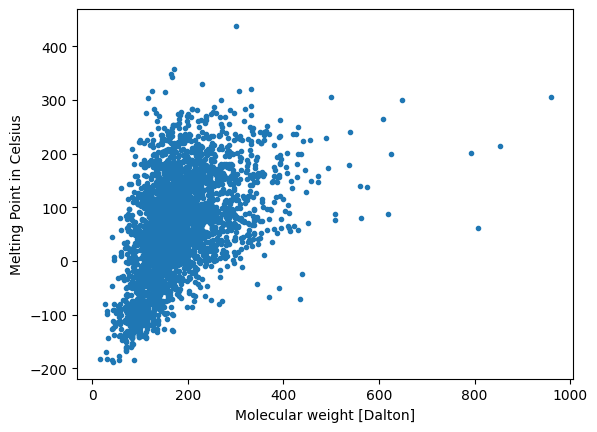

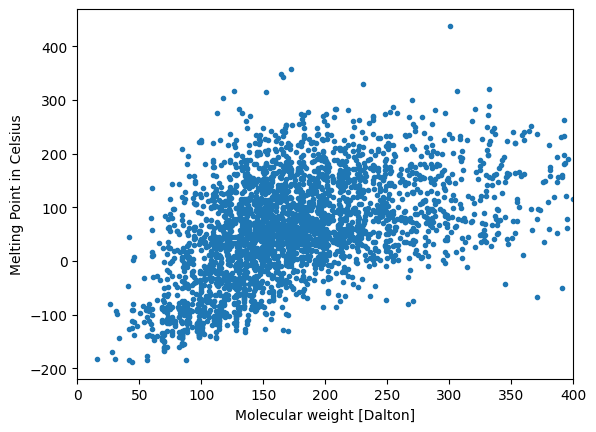

In [69]:
plt.plot(molecular_weight,melting_point_c,'.')
plt.ylabel("Melting Point in Celsius")
plt.xlabel("Molecular weight [Dalton]")
plt.show()

plt.plot(molecular_weight,melting_point_c,'.')
plt.ylabel("Melting Point in Celsius")
plt.xlabel("Molecular weight [Dalton]")
plt.xlim([0,400])
plt.show()

In [70]:
# can also write a function to simplify:
def number_of_rings(smi):
  mol = Chem.MolFromSmiles(smi)
  if mol is not None:
    return rdMolDescriptors.CalcNumRings(mol)
  else:
    return np.nan

# can also write a function to simplify:
def number_of_rotatable_bonds(smi):
  mol = Chem.MolFromSmiles(smi)
  if mol is not None:
    return rdMolDescriptors.CalcNumRotatableBonds(mol)
  else:
    return np.nan



In [71]:
number_of_rings = [number_of_rings(smi) for smi in smiles]

number_of_rotatable_bonds = [number_of_rotatable_bonds(smi) for smi in smiles]

[17:47:20] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[17:47:20] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
[17:47:20] Can't kekulize mol.  Unkekulized atoms: 24 25 26 27 28 31 32 33 34
[17:47:20] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[17:47:20] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[17:47:20] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[17:47:20] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20 21 22 23 24
[17:47:20] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
[17:47:20] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[17:47:20] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[17:47:20] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[17:47:21] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[17:47:21] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 12 13 14 15 16
[17:47:21] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[17:47:21] Can't kekulize mol.  Unkekuliz

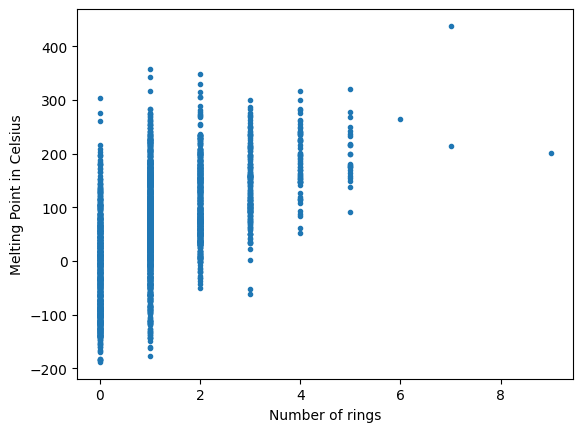

In [72]:
plt.plot(number_of_rings,melting_point_c,'.')
plt.ylabel("Melting Point in Celsius")
plt.xlabel("Number of rings")
plt.show()

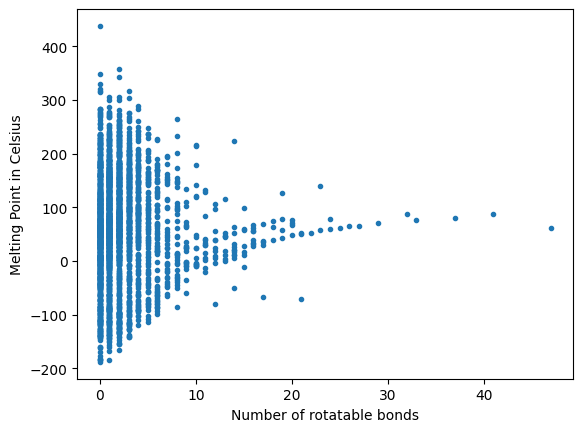

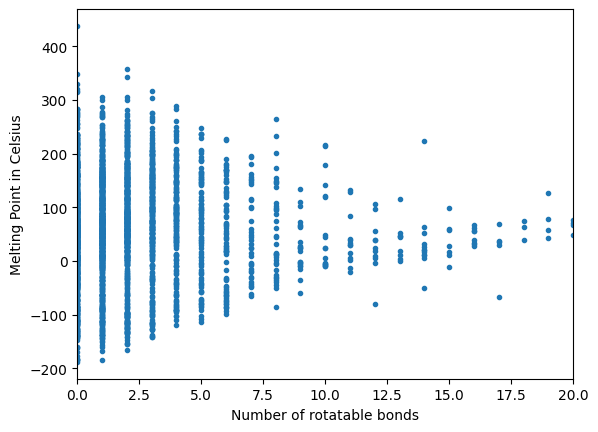

In [73]:
plt.plot(number_of_rotatable_bonds,melting_point_c,'.')
plt.ylabel("Melting Point in Celsius")
plt.xlabel("Number of rotatable bonds")
plt.show()

plt.plot(number_of_rotatable_bonds,melting_point_c,'.')
plt.ylabel("Melting Point in Celsius")
plt.xlabel("Number of rotatable bonds")
plt.xlim([0,20])
plt.show()

We can also create a new pandas DataFrame and save it as a CSV file

In [80]:
data = list(zip(names, smiles, melting_point_c, molecular_weight))
print(data[0])

('cyclobutylmethane', 'C1(CCC1)C', np.float64(-161.51), np.float64(70.135))


In [86]:
data_new = pd.DataFrame(data, columns=["name", "smiles", "melting_point_c","molecular_weight"])


In [87]:
data_new

,name,smiles,melting_point_c,molecular_weight
0,cyclobutylmethane,C1(CCC1)C,-161.51,70.135
1,Nitrogen oxide,[O-][N+]#N,-90.80,44.013
2,Sulfuryl difluoride,FS(F)(=O)=O,-135.80,102.061
3,disopyramide,CC(C)N(CCC(c1ccccn1)(c2ccccc2)C(N)=O)C(C)C,94.80,339.483
4,Bromine,BrBr,-7.20,159.808
...,...,...,...,...
3036,4-Nitrobenzoic acid,C1=CC(=CC=C1C(=O)O)[N+](=O)[O-],240.00,167.120
3037,Thalidomide,C1CC(=O)NC(=O)C1N2C(=O)C3=CC=CC=C3C2=O,275.00,258.233
3038,Estradiol,C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2O)CCC4=C3...,176.00,272.388
3039,"2,4,6-Trichlorophenol",C1=C(C=C(C(=C1Cl)O)Cl)Cl,65.00,197.448


In [88]:
data_new.to_csv("test.csv")

In [89]:
!head test.csv

,name,smiles,melting_point_c,molecular_weight
0,cyclobutylmethane,C1(CCC1)C,-161.51,70.135
1,Nitrogen oxide,[O-][N+]#N,-90.8,44.013
2,Sulfuryl difluoride,FS(F)(=O)=O,-135.8,102.06099999999999
3,disopyramide,CC(C)N(CCC(c1ccccn1)(c2ccccc2)C(N)=O)C(C)C,94.8,339.4830000000002
4,Bromine,BrBr,-7.2,159.808
5,Lomefloxacin,O=C(O)C2=CN(CC)c1c(F)c(c(F)cc1C2=O)N3CC(C)NCC3,239.75,351.3530000000001
6,"N,N-Dimethylmethanamine",CN(C)C,-117.0,59.111999999999995
7,Tetrachloromethane,ClC(Cl)(Cl)Cl,-23.0,153.823
8,Iodine,II,113.5,253.808


chlordiazepoxide: Clc1ccc2N=C(C[N+]([O-])=C(c2c1)c3ccccc3)NC
Molecular weight: 299.761
Ring Count: 3
Heavy Atom Count: 21
Number of Rotatable Bonds: 1


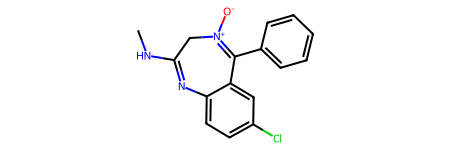

In [91]:
idx=100
name = data_mp['name'][idx]
smi = data_mp['smiles'][idx]
print(f"{name:s}: {smi:s}")
mol = Chem.MolFromSmiles(smi)
print("Molecular weight:",Descriptors.MolWt(mol))
print("Ring Count:",Descriptors.RingCount(mol))
print("Heavy Atom Count:",Descriptors.HeavyAtomCount(mol))
print("Number of Rotatable Bonds:",Descriptors.NumRotatableBonds(mol))
mol

In [92]:
mol.GetNumBonds()

23

In [97]:
np.log(-10.0)
np.log(0)



/tmp/ipython-input-1652103753.py:1: RuntimeWarning: invalid value encountered in log
  np.log(-10.0)
/tmp/ipython-input-1652103753.py:2: RuntimeWarning: divide by zero encountered in log
  np.log(0)
/tmp/ipython-input-1652103753.py:4: RuntimeWarning: invalid value encountered in log
  np.log(1)+np.log(-10.0)


np.float64(nan)

In [100]:
rng = np.random.default_rng()
test = rng.normal(loc=0,scale=10,size=1000)
print(np.average(test))

0.004277892401608469


In [102]:
rng = np.random.default_rng()
test = rng.normal(loc=0,scale=10,size=1000)
test[100] = np.nan
print(np.nanmean(test))

0.044896916896889294


In [105]:
data_test = pd.read_csv("test.csv")

In [106]:
data_test

,Unnamed: 0,name,smiles,melting_point_c,molecular_weight
0,0,cyclobutylmethane,C1(CCC1)C,-161.51,NaN
1,1,Nitrogen oxide,[O-][N+]#N,-90.80,44.013
2,2,Sulfuryl difluoride,FS(F)(=O)=O,-135.80,102.061
3,3,disopyramide,CC(C)N(CCC(c1ccccn1)(c2ccccc2)C(N)=O)C(C)C,94.80,339.483
4,4,Bromine,BrBr,-7.20,159.808
...,...,...,...,...,...
3036,3036,4-Nitrobenzoic acid,C1=CC(=CC=C1C(=O)O)[N+](=O)[O-],240.00,167.120
3037,3037,Thalidomide,C1CC(=O)NC(=O)C1N2C(=O)C3=CC=CC=C3C2=O,275.00,258.233
3038,3038,Estradiol,C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2O)CCC4=C3...,176.00,272.388
3039,3039,"2,4,6-Trichlorophenol",C1=C(C=C(C(=C1Cl)O)Cl)Cl,65.00,197.448


In [113]:
is_nan = np.isnan(data_test['molecular_weight'])
print(is_nan)
print(np.sum(is_nan))

0        True
1       False
2       False
3       False
4       False
        ...  
3036    False
3037    False
3038    False
3039    False
3040    False
Name: molecular_weight, Length: 3041, dtype: bool
17


## Example of using inf

In [115]:
def find_min_max_value(array):
  min_value = +np.inf
  max_value = -np.inf
  min_idx = None
  max_idx = None
  for idx, value in enumerate(array):
    if value < min_value:
      min_value = value
      min_idx = idx
    if value > max_value:
      max_value = value
      max_idx = idx
  return min_value, max_value, min_idx, max_idx


In [116]:
rng = np.random.default_rng()

test = rng.normal(loc=0,scale=10,size=1000)

print(find_min_max_value(test))
print(test.min())
print(test.argmin())
print(test.max())
print(test.argmax())


(np.float64(-35.52484066594), np.float64(37.17325864575719), 350, 328)
-35.52484066594
350
37.17325864575719
328


In [143]:
def power_of_2(np_array):
  return np_array**2

def power_of(np_array,power=2):
  return np_array**power

def MaxAbsScaler(array):
  max_abs_value=np.max(np.abs(array))
  new_array = array/max_abs_value
  return new_array

def MaxAbsScaler_v2(array):
  return array/np.max(np.abs(array))


In [140]:
rng = np.random.default_rng()
test = rng.normal(loc=0,scale=10,size=1000)

test_scaled = MaxAbsScaler(test)

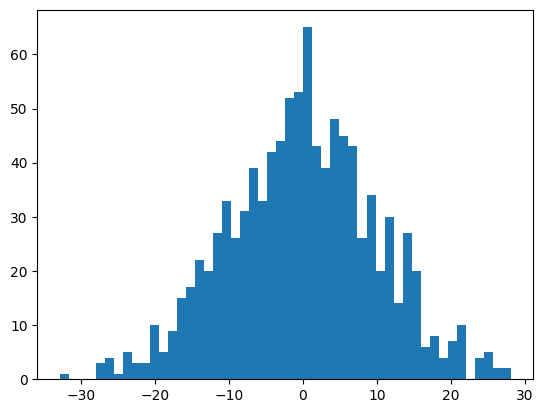

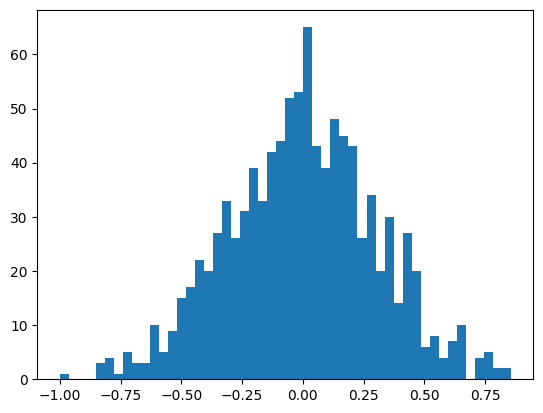

In [142]:
plt.hist(test,bins=50)
plt.show()

plt.hist(test_scaled,bins=50)
plt.show()


In [126]:
test = np.array([1, 2, 3, 4])
print(test)
print(power_of(test,power=3))

[1 2 3 4]
[ 1  8 27 64]
